### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Thoughts on the Results

# Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\Arjun\Desktop\Career Foundry\Airbnb'

In [5]:
path

'C:\\Users\\Arjun\\Desktop\\Career Foundry\\Airbnb'

In [9]:
df_listings = pd.read_csv(os.path.join(path,'Data','Prepared Data','listings_wrangled.csv'))

# Data Cleaning

In [10]:
#Checking the imported dataset
df_listings.head()

,Unnamed: 0,airbnb_listing_id,airbnb_listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [11]:
df_listings.shape

(20030, 16)

In [12]:
#Removing the column Unnamed
df_listings = df_listings.drop(columns = ['Unnamed: 0'])

In [13]:
#Verifying the dataset
df_listings.head()

,airbnb_listing_id,airbnb_listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [14]:
#Checking the column names
df_listings.columns

Index(['airbnb_listing_id', 'airbnb_listing_name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
#Checking for missing values
df_listings.isnull().sum()

airbnb_listing_id                    0
airbnb_listing_name                 38
host_id                              0
host_name                            4
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2406
reviews_per_month                 2406
calculated_host_listings_count       0
availability_365                     0
dtype: int64

As discussed in the last exercise, the null values for the reviews were for the newly posted listings in the Amsterdam dataset. Hence, we will retain these null valued columns and not modify with the data columns.

In [18]:
# Check for duplicate values
dup = df_listings.duplicated()

In [20]:
dup.shape

(20030,)

As expected, there are no duplicates in the dataset.

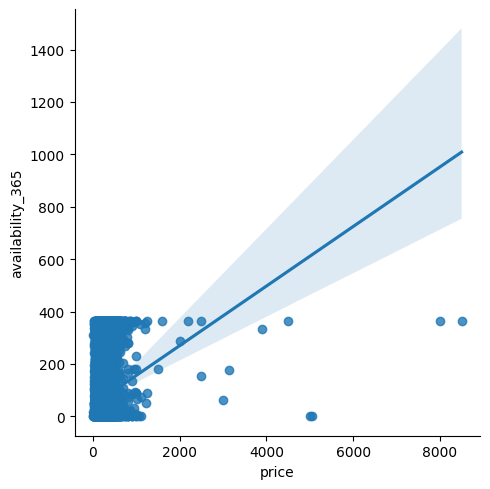

In [73]:
# Scatterplot for price and availability_365 using seaborn library

scatter1 = sns.lmplot(x = 'price', y = 'availability_365', data = df_listings)


In [53]:
#Check the mean
df_listings['price'].mean()

152.18117823265104

In [54]:
#Check the median
df_listings['price'].median()

125.0

In [55]:
#Check the max
df_listings['price'].max()

8500

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price', ylabel='Density'>

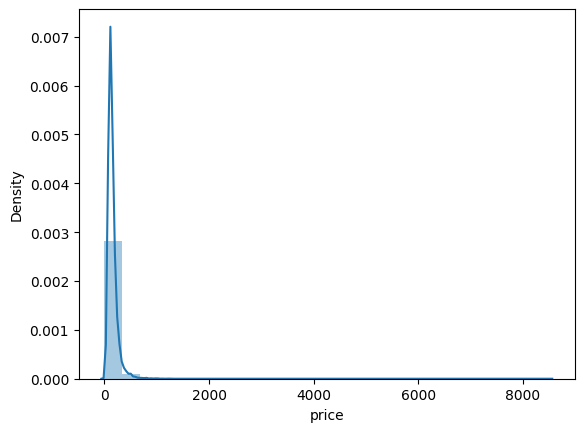

In [56]:
#Extreme value checks
sns.distplot(df_listings['price'], bins=25) 

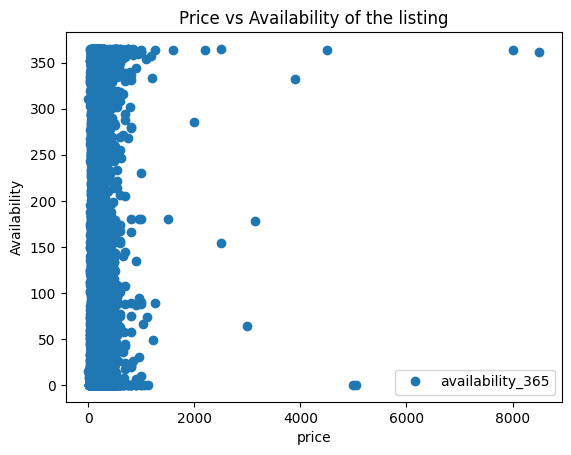

In [74]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_listings.plot('price', y = 'availability_365',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs Availability of the listing')  
plt.xlabel('price')  
plt.ylabel('Availability')  
plt.show()

# Hypothesis

Lower the price of the listing, Lesser the count of Availability_365. i.e.,- the Availability of the listing within the Airbnb website.

# Data Prep for Regression Analysis

In [75]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_listings['price'].values.reshape(-1,1)
y = df_listings['availability_365'].values.reshape(-1,1)

In [76]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [77]:
regression = LinearRegression() 

In [78]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [79]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

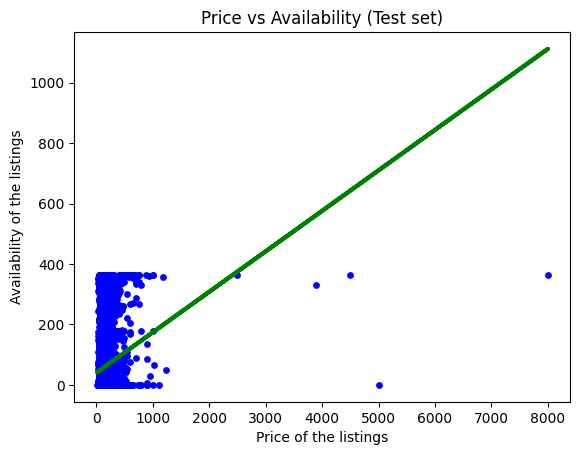

In [81]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Price vs Availability (Test set)')
plot_test.xlabel('Price of the listings')
plot_test.ylabel('Availability of the listings')
plot_test.show()

As we can see there are many points away from the Regression line, lets take the analysis further

In [83]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [82]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13395145]]
Mean squared error:  10541.912549663126
R2 score:  0.013786199593695203


## Analysis Interpretation

The slope value of 0.134 indicates there is a positive linear relationship as per our hypothesis. However, the Mean Squared Error value of 10541 shows that Regression Analysis is not the right model for representation of data. This shows that Availability of the listing is not fully dependent on the Price only. Also, the value of the R-squared value of 0.013 shows that Regression line is not a good fit for the variables.

In [84]:
y_predicted

array([[60.05686192],
       [58.71734741],
       [60.05686192],
       ...,
       [48.00123132],
       [54.02904662],
       [49.20679438]])

In [85]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,60.056862
1,14,58.717347
2,0,60.056862
3,7,50.680260
4,315,57.377833
5,270,54.029047
6,321,46.661717
7,25,53.359289
8,350,55.368561
9,0,51.885823


### Checking how the regression line fits the Training set

In [86]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [87]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [88]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13395145]]
Mean squared error:  10561.486698516544
R2 score:  0.029044232933569503


### Reflections on the impact of possible data bias.

The values seem to be similar to the Test data. This shows that the Regression is not the right model for the variables. Also, the availability of the listing are not fully dependent on the Price of the listing, it might depend on other factors like the holiday season, the quality of the listing, the neighborhood factor of the listing.

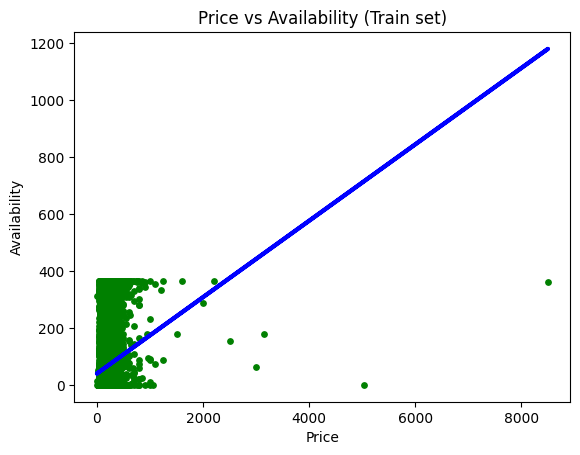

In [89]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Price vs Availability (Train set)')
plot_test.xlabel('Price')
plot_test.ylabel('Availability')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [90]:
# Clean the extreme values from the "Price" variable observed during the consistency checks.

df_test = df_listings[df_listings['price'] < 500] 

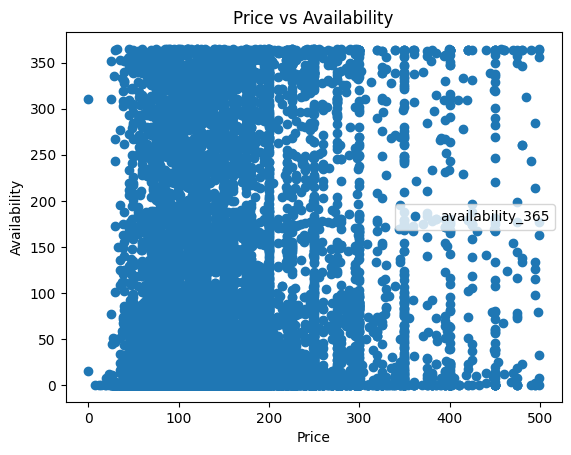

In [91]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'price', y='availability_365', style='o')  
plt.title('Price vs Availability')  
plt.xlabel('Price')  
plt.ylabel('Availability')  
plt.show()

In [92]:
# Reshape again.

X_2 = df_test['price'].values.reshape(-1,1)
y_2 = df_test['availability_365'].values.reshape(-1,1)

In [93]:
#Spliting the data into test and train set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [94]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [95]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [96]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [97]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.21471055]]
Mean squared error:  9653.08599053229
R2 score:  0.022750054194234037


The R2 score have improved when the outlier values of price have removed from the dataset, but still the same issue of Regression line not fitting for the variables.

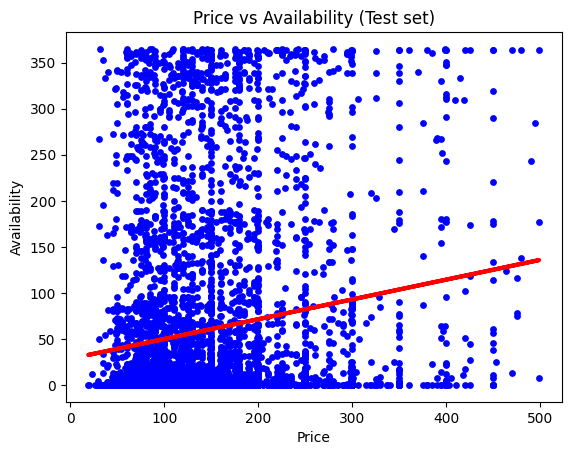

In [100]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='blue', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Price vs Availability (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Availability')
plot_test.show()

In [102]:
#Converting into the dataframe
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0,56.177243
1,34,66.053928
2,68,92.892747
3,0,62.833270
4,77,60.686165
5,0,41.147505
6,5,44.582873
7,0,49.950637
8,0,82.157220
9,13,43.938742
